### 방문자 리뷰 크롤링
- 이런점이 좋았어요(음식이 맛있어요, 가격이 저렴해요 등등)
- 리뷰 개수

In [1]:
# 패키지 임포트
import pandas as pd
import numpy as np
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time
from tqdm import tqdm_notebook

In [2]:
# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [3]:
res_table = pd.read_csv("./datas/서울시 착한가격음식점(업소URL추가).csv", encoding='CP949',index_col=0)
res_table

,업소아이디,업소명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,기준년월,업소 사진,위도,경도,행정구,행정동,검색명,업소URL
0,1739,목우촌부추삼겹살,1,한식,서울특별시 관악구 남현1길 68-10 (남현동),588-7399,전철 2호선 4호선 사당역에서 5번출구로 나오시면 (구)관악등기소쪽 먹자골목으로 5...,영업시간 : 오전 10시 ~ 오후 11시 30분 좌석수 : 44석 휴무일 : 연중무...,▷사당역 먹자골목에 위치 ▷김치찌개된장찌개 2010년부터 가격 동결 ▷친절업소,257,21-2,http://tearstop.seoul.go.kr/mulga/photo/201501...,37.475340,126.981090,관악구,남현동,관악구 남현동 목우촌부추삼겹살,21025096
1,4325,청진동해장국,1,한식,서울특별시 관악구 관악로 105 (봉천동) 동산빌딩1층,875-9882,지하철 2호선 서울대입구역 3번 출구로 나와서 서울대학교 쪽으로 직진 도보10분 관...,영업시간 : 24시간 좌석수 : 80석 휴무일 : 연중무휴 배달 : 불가 예약 :...,관악구 평균가격(5000원) 보다 10% 저렴 김치 깍두기 등 직접 만들어 신선함.,252,21-2,http://tearstop.seoul.go.kr/mulga/photo/202207...,37.474630,126.952599,관악구,봉천동,관악구 봉천동 청진동해장국,-
2,7851,오백냥분식,1,한식,서울특별시 송파구 가락로 112 (석촌동),414-2261,전철노선: 8호선 송파역 4번출구 중동빌딩 버스노서 : 3417.3418.3422....,영업시간:08:00~21:00 휴무일:연중무휴 좌 석:20석 주 차:가능,배 달:불가 예 약:불가 카 드:가능,236,21-2,http://tearstop.seoul.go.kr/mulga/photo/201207...,37.501272,127.108509,송파구,석촌동,송파구 석촌동 오백냥분식,13153220
3,6764,토방 닭 한마리,1,한식,서울특별시 관악구 신림로22길 5 (신림동),874-6895,신성부동산 건물 바로 뒷건물,영업시간 : 오전 10시 ~ 오후 10시 좌석수 : 50석 예약 : 가능 카드 : ...,▷관악구 평균가격보다 10% 저렴 ▷반찬을 여러가지 하지 않고 김치와 깍두기 두가지...,214,21-2,http://tearstop.seoul.go.kr/mulga/photo/202207...,37.471647,126.935306,관악구,신림동,관악구 신림동 토방 닭 한마리,20829543
4,3986,왕세숫대야냉면(행복을파는집),1,한식,서울특별시 강서구 공항대로 423(등촌동),02-2668-3608,화진코스메틱에서 강서구청4거리쪽으로 조금만 올라오세요~,영업시간 : 24시간 좌석수 : 30개 휴무일 : 미정 배달 : 불가 카드 : 가능...,많이 판매가 되므로 저렴한 가격유지 그날그날 신선한 재료사용하여 조리합니다.,163,21-2,http://tearstop.seoul.go.kr/mulga/photo/000039...,37.555567,126.854372,강서구,등촌동,강서구 등촌동 왕세숫대야냉면(행복을파는집),36004335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,9156,삼겹살데이,1,한식,서울특별시 서대문구 가좌로 29 (연희동),324-0301,NaN,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,NaN,0,21-2,http://tearstop.seoul.go.kr/mulga/photo/,37.577197,126.932276,서대문구,연희동,서대문구 연희동 삼겹살데이,18797155
729,9101,홍능갈비,1,한식,서울특별시 금천구 범안로21길 6 (독산동),02-894-8292,NaN,영업시간 : 12:00~23:00 좌석수 : 휴무일 : 배달 : 불가 예약 : 카드...,NaN,0,21-2,http://tearstop.seoul.go.kr/mulga/photo/201709...,37.466783,126.896917,금천구,독산동,금천구 독산동 홍능갈비,13468661
730,9315,보물쌈,1,한식,서울특별시 동작구 상도로 296-2 (상도1동),814-2151,NaN,저렴한 가격 깨끗한 위생,저렴한 가격 깨끗한 위생,0,21-2,http://tearstop.seoul.go.kr/mulga/photo/201909...,37.501177,126.948946,동작구,상도1동,동작구 상도1동 보물쌈,19763907
731,9279,가정식당,1,한식,서울특별시 강남구 학동로77길 20 (청담동),02-514-8009,NaN,영업시간 :09:00~21:00 좌석수 : 휴무일 : 배달 :가능 예약 : 카드 :...,NaN,0,21-2,http://tearstop.seoul.go.kr/mulga/photo/201907...,37.519992,127.048890,강남구,청담동,강남구 청담동 가정식당,20874132


In [4]:
res_url = res_table['업소URL']
res_url

0      21025096
1             -
2      13153220
3      20829543
4      36004335
         ...   
728    18797155
729    13468661
730    19763907
731    20874132
732    34353503
Name: 업소URL, Length: 733, dtype: object

In [5]:
review_table = res_table[['업소아이디']]
review_table

,업소아이디
0,1739
1,4325
2,7851
3,6764
4,3986
...,...
728,9156
729,9101
730,9315
731,9279


In [6]:
review_table['총개수'] = 0

In [7]:
review_table['키워드1'] = 0
review_table['개수1'] = 0
review_table['키워드2'] = 0
review_table['개수2'] = 0
review_table['키워드3'] = 0
review_table['개수3'] = 0
review_table['키워드4'] = 0
review_table['개수4'] = 0
review_table['키워드5'] = 0
review_table['개수5'] = 0

In [8]:
review_table['URL'] = res_url

In [9]:
review_table.head()

,업소아이디,총개수,키워드1,개수1,키워드2,개수2,키워드3,개수3,키워드4,개수4,키워드5,개수5,URL
0,1739,0,0,0,0,0,0,0,0,0,0,0,21025096
1,4325,0,0,0,0,0,0,0,0,0,0,0,-
2,7851,0,0,0,0,0,0,0,0,0,0,0,13153220
3,6764,0,0,0,0,0,0,0,0,0,0,0,20829543
4,3986,0,0,0,0,0,0,0,0,0,0,0,36004335


#### https://pcmap.place.naver.com/restaurant/음식점id/home
#### https://pcmap.place.naver.com/restaurant/음식점id/menu/list
#### https://pcmap.place.naver.com/restaurant/음식점id/review/visitor

In [77]:
front_url = 'https://pcmap.place.naver.com/restaurant/'
res_id = res_url[9] 
back_url = '/review/visitor'

In [78]:
url = front_url + res_id + back_url
url

'https://pcmap.place.naver.com/restaurant/18800486/review/visitor'


<!DOCTYPE html>

<html lang="ko">
<head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no viewport-fit=cover" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://pcmap.place.naver.com/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://pcmap.place.
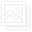
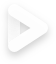
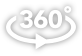
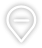

In [30]:
html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')
soup

In [52]:
total_num = soup.find('div','_1GBfs').text.split('회')[0]  # 34회(31명 참여)
total_num

'34'

In [31]:
soup_list = soup.find_all('li','X4uex')
soup_list

[<li class="X4uex"><div class="_1cQoC" style="width:76.47058823529412%"></div><div class="_2B33i"><img alt="" class="_2iZo0" height="22" src="https://ssl.pstatic.net/static/pup/emoji/face_savoring_food20220119222022.png" width="22"/><span class="_10uv0">"<!-- -->음식이 맛있어요<!-- -->"</span><span class="_3IFxe"><span class="place_blind">이 키워드를 선택한 인원</span>26</span></div></li>,
 <li class="X4uex"><div class="_1cQoC" style="width:29.411764705882355%"></div><div class="_2B33i"><img alt="" class="_2iZo0" height="22" src="https://ssl.pstatic.net/static/pup/emoji/beating_heart20220119222223.png" width="22"/><span class="_10uv0">"<!-- -->친절해요<!-- -->"</span><span class="_3IFxe"><span class="place_blind">이 키워드를 선택한 인원</span>10</span></div></li>,
 <li class="X4uex"><div class="_1cQoC" style="width:26.47058823529412%"></div><div class="_2B33i"><img alt="" class="_2iZo0" height="22" src="https://ssl.pstatic.net/static/pup/emoji/coin20220119222025.png" width="22"/><span class="_10uv0">"<!-- -->가성비가 좋아

In [44]:
keyword = []
num = []

In [35]:
str = soup_list[0].find('span','_10uv0').text.replace('"','')
str

'음식이 맛있어요'

In [42]:
str = soup_list[0].find('span','_3IFxe').text.replace('이 키워드를 선택한 인원','')
str

'26'

In [45]:
for item in soup_list :
    keyword.append(item.find('span','_10uv0').text.replace('"',''))
    num.append(item.find('span','_3IFxe').text.replace('이 키워드를 선택한 인원',''))

In [46]:
keyword

['음식이 맛있어요', '친절해요', '가성비가 좋아요', '재료가 신선해요', '양이 많아요']

In [47]:
num

['26', '10', '9', '5', '5']

In [64]:
review_table['키워드1'][9]

0

In [65]:
keyword[1]

'친절해요'

In [68]:
review_table['총개수'][9] = total_num
review_table['키워드1'][9] = keyword[0]
review_table['개수1'][9] = num[0]
review_table['키워드2'][9] = keyword[1]
review_table['개수2'][9] = num[1]
review_table['키워드3'][9] = keyword[2]
review_table['개수3'][9] = num[2]
review_table['키워드4'][9] = keyword[3]
review_table['개수4'][9] = num[3]
review_table['키워드5'][9] = keyword[4]
review_table['개수5'][9] = num[4]

In [70]:
review_table.loc[9]

업소아이디        5959
총개수            34
키워드1     음식이 맛있어요
개수1            26
키워드2         친절해요
개수2            10
키워드3     가성비가 좋아요
개수3             9
키워드4     재료가 신선해요
개수4             5
키워드5       양이 많아요
개수5             5
Name: 9, dtype: object

#### 리뷰키워드, 리뷰개수 크롤링 함수
- 이런점이 좋았어요 10명 미만 참여시 비공개
- 이런점이 좋았어요 기능을 사용하지 않는 업소도 있음

In [10]:
print(len(res_url))
print(len(review_table))

733
733


In [34]:
for i in tqdm_notebook(review_table.index[700:]) :
    try :
        u = review_table['URL'][i]
        if u != '-' :
            front_url = 'https://pcmap.place.naver.com/restaurant/'
            res_id = u
            back_url = '/review/visitor'
    
            url = front_url + res_id + back_url
            url

            html = urlopen(url)
            time.sleep(0.5)
            
            soup = BeautifulSoup(html,'html.parser')
            soup

            # 10명이상 참여하지 않으면 비공개 
            # 총개수 추출
            total_num = soup.find('div','_1GBfs').text.split('회')[0]  # 34회(31명 참여)

            # 이런 점이 좋았어요 추출
            keyword = []
            num = []

            soup_list = soup.find_all('li','X4uex')
            time.sleep(0.5)
            for item in soup_list :
                keyword.append(item.find('span','_10uv0').text.replace('"',''))
                num.append(item.find('span','_3IFxe').text.replace('이 키워드를 선택한 인원',''))

            # 데이터 저장
            review_table['총개수'][i] = total_num
            review_table['키워드1'][i] = keyword[0]
            review_table['개수1'][i] = num[0]
            review_table['키워드2'][i] = keyword[1]
            review_table['개수2'][i] = num[1]
            review_table['키워드3'][i] = keyword[2]
            review_table['개수3'][i] = num[2]
            review_table['키워드4'][i] = keyword[3]
            review_table['개수4'][i] = num[3]
            review_table['키워드5'][i] = keyword[4]
            review_table['개수5'][i] = num[4]
    except :
        print('error : ',i)

<ipython-input-34-21d549609fb9>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(review_table.index[700:]) :


error :  707
error :  716
error :  718
error :  729



In [36]:
review_table.loc[716]

업소아이디          9433
총개수               0
키워드1              0
개수1               0
키워드2              0
개수2               0
키워드3              0
개수3               0
키워드4              0
개수4               0
키워드5              0
개수5               0
URL      1105168073
Name: 716, dtype: object

In [38]:
review_table.head()
review_table.tail()

,업소아이디,총개수,키워드1,개수1,키워드2,개수2,키워드3,개수3,키워드4,개수4,키워드5,개수5,URL
728,9156,79,음식이 맛있어요,60,가성비가 좋아요,33,친절해요,25,양이 많아요,14,재료가 신선해요,13,18797155
729,9101,0,0,0,0,0,0,0,0,0,0,0,13468661
730,9315,130,음식이 맛있어요,71,가성비가 좋아요,37,양이 많아요,25,친절해요,21,혼밥하기 좋아요,11,19763907
731,9279,51,음식이 맛있어요,18,가성비가 좋아요,13,친절해요,11,반찬이 잘 나와요,8,재료가 신선해요,6,20874132
732,9069,219,음식이 맛있어요,174,친절해요,31,재료가 신선해요,22,양이 많아요,20,가성비가 좋아요,19,34353503


In [40]:
review_table.to_csv('./datas/서울시 착한가격음식점(방문자리뷰 TOP5).csv',encoding='CP949')

### 키워드/리뷰 총개수 크롤링
- 이런점이 좋았어요 총 수 (keyword_total)
- 별점 부여한 사람 총 수 (star_total)
- : 강남구, 동작구, 서대문구
- ['키워드총개수']['별점총개수']

In [37]:
k_table = pd.read_csv('./datas/강남구(별점+리뷰).csv', encoding='CP949',index_col=0)
d_table = pd.read_csv('./datas/동작구(별점+리뷰).csv', encoding='CP949',index_col=0)
s_table = pd.read_csv('./datas/서대문구(별점+리뷰).csv', encoding='CP949',index_col=0)

In [4]:
k_table.columns

Index(['index', '상세영업상태명', '전화번호', '소재지면적', '소재지우편번호', '지번주소', '도로명주소',
       '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)',
       '좌표정보(Y)', '위생업태명', '업소id', '별점', '리뷰'],
      dtype='object')

In [5]:
k_table.head(1)

,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰
0,0,영업,234748466,77.35,135859.0,서울특별시 강남구 도곡동 942-9,서울특별시 강남구 강남대로58길 19 1층 (도곡동),6259.0,고래똥,2.021060e+13,U,2021-06-05 2:40,한식,202908.5511,443054.6911,한식,1035640949,4.72,"[11, 5, 2, '0', '0', 2, '0', '0', 8, '0', 1, '..."


In [47]:
print(len(k_table))
print(len(d_table))
print(len(s_table))

697
834
777


In [35]:
front_url = 'https://pcmap.place.naver.com/restaurant/'
# res_id = '696505519'
res_id = '1192293819'
back_url = '/review/visitor'
    
url = front_url + res_id + back_url
url

html = urlopen(url)

In [16]:
k_table['별점'].head(10)

0    4.72
1    4.96
2    4.34
3    4.23
4    4.09
5    4.27
6    4.36
7    4.33
8    4.63
9       -
Name: 별점, dtype: object

In [17]:
print(k_table['별점'][9] == '-')

True


In [34]:
k_table['업소id'][9]

1192293819

In [36]:
soup = BeautifulSoup(html,'html.parser')
soup
if k_table['별점'][9] != '-' :
    star_total = soup.find_all('span','ANYgl')[1].text.split('개')[0] 
    print(star_total)
keyword_total = soup.find('div','_1GBfs').text.split('회')[0]
print(keyword_total)

AttributeError: 'NoneType' object has no attribute 'text'

In [27]:
star_total[1].text.split('개')[0]

'51'

In [9]:
keyword_total.text

AttributeError: 'NoneType' object has no attribute 'text'

In [112]:
print(keyword_total == [])

True


In [104]:
keyword_total[0].text.split('회')[0] 

'21'

In [113]:
soup = BeautifulSoup(html,'html.parser')
soup

# total_num = soup.find('div','_1V5HD').text.split('회')[0]  # 34회(31명 참여)
# str = soup.find('div','_1V5HD')
str1 = soup.find_all('span','ANYgl')
str1

[]

In [35]:
str1[1].text.split('개')[0]

'32'

In [27]:
str1[1].text.split('개')[0]

'177'

In [20]:
del str

In [69]:
keyword_data = []
star_data = []

In [48]:
len(keyword_data)

0

In [44]:
keyword_data

['21', '89', '73', '141', '17', '76', '101', '-', '16', '-']

In [46]:
star_data

['51', '14', '196', '193', '35', '201', '199', '32', '20', '-']

In [74]:
s_table['업소id'] = s_table['업소id'].astype(str)

In [62]:
type(s_table['업소id'][7])

str

In [72]:
s_table['업소id'].unique()

array([1050286731,  293341203, 1887456010, 1684270213,   38466760,
       1274847284, 1150580423,   21259049, 1084097814, 1107644965,
       1529635488, 1012592438,   32739391,   33832996, 1456735147,
         36406584,   13470736,   13150719,  847623888,   13347695,
         11618531, 1010622408, 1744417217,   36343564,  956557603,
       1412611730, 1705309008, 1072528741, 1086088653, 1188146910,
         38522537, 1632025500,  919495042,   36432334, 1725031544,
         18208118, 1491408912,   31442520,   37997536,   37250171,
         18746327, 1731987471,   11593472, 1023301438, 1507072056,
       1318439602, 1467115171,   37391652, 1960457705, 1524272466,
       1408416281,   42876925, 1965415963,   13452907, 1010769241,
       1519562977, 1592624032, 1988687728, 1232792293,   21900697,
       1793967582, 1100940033, 1823159874, 1620235060, 1747599758,
       1954881301, 1447626937, 1987031753,   13446419, 1314671448,
       1114699025, 1204617501, 1576315885,  380995011,   37057

In [64]:
print(len(k_table))
print(len(k_table[k_table['별점총개수']=='-']))
print(len(k_table[k_table['키워드총개수']=='-']))
print()
print(len(d_table))
print(len(d_table[d_table['별점총개수']=='-']))
print(len(d_table[d_table['키워드총개수']=='-']))
print()
print(len(s_table))
print(len(s_table[s_table['별점총개수']=='-']))
print(len(s_table[s_table['키워드총개수']=='-']))

697
200
177

834
170
160

777
188
192


- 로직 바꾸기 전

697
200
256 -> 177

834
170
239 -> 160

777
188
265 -> 192

In [58]:
s_table['업소id'] = s_table['업소id'].astype(str)

keyword_data = []
star_data = []

front_url = 'https://pcmap.place.naver.com/restaurant/'
back_url = '/review/visitor'

for i in tqdm_notebook(s_table.index) :
    star_total = '-'
    keyword_total = '-'
    try :
        res_id = s_table['업소id'][i]
        if res_id != '-' :

            url = front_url + res_id + back_url

            html = urlopen(url)
            time.sleep(0.5)

            soup = BeautifulSoup(html,'html.parser')
            
            if s_table['별점'][i] != '-' :
                star_total = soup.find_all('span','ANYgl')[1].text.split('개')[0] 
                
            keyword_total = soup.find('div','_1GBfs').text.split('회')[0]
            
            # 데이터 저장
            star_data.append(star_total)
            keyword_data.append(keyword_total)
            
            html.close()
            
            if (i % 100 == 0)  and (i != 0) :
                time.sleep(10)
    except :
        star_data.append(star_total)
        keyword_data.append(keyword_total)
        print('error : ', i)

<ipython-input-58-d0d8b0906738>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(s_table.index) :


error :  0
error :  1
error :  8
error :  14
error :  16
error :  21
error :  22
error :  31
error :  33
error :  34
error :  39
error :  44
error :  46
error :  47
error :  51
error :  64
error :  68
error :  69
error :  71
error :  72
error :  77
error :  80
error :  90
error :  91
error :  94
error :  99
error :  101
error :  105
error :  107
error :  112
error :  114
error :  116
error :  129
error :  130
error :  133
error :  134
error :  135
error :  136
error :  138
error :  144
error :  161
error :  164
error :  170
error :  178
error :  184
error :  185
error :  192
error :  198
error :  201
error :  205
error :  207
error :  214
error :  219
error :  225
error :  226
error :  233
error :  234
error :  237
error :  239
error :  243
error :  246
error :  253
error :  260
error :  263
error :  266
error :  268
error :  280
error :  281
error :  283
error :  290
error :  293
error :  301
error :  305
error :  317
error :  318
error :  319
error :  324
error :  328
error :  329
er

In [59]:
print(len(star_data))
star_data.count('-')

777


188

In [60]:
print(len(keyword_data))
keyword_data.count('-')

777


192

In [41]:
len(k_table)

697

In [45]:
k_table['별점총개수'] = star_data
k_table['키워드총개수'] = keyword_data
k_table

,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,...,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰,별점총개수,키워드총개수
0,0,영업,234748466,77.35,135859.0,서울특별시 강남구 도곡동 942-9,서울특별시 강남구 강남대로58길 19 1층 (도곡동),6259.0,고래똥,2.021060e+13,...,2021-06-05 2:40,한식,202908.5511,443054.6911,한식,1035640949,4.72,"[11, 5, 2, '0', '0', 2, '0', '0', 8, '0', 1, '...",51,21
1,1,영업,NaN,26.30,135863.0,서울특별시 강남구 삼성동 4-4,서울특별시 강남구 선릉로130길 57 지상1층 28호29호 (삼성동),6089.0,비앙57 Bien57,2.022050e+13,...,2021-12-04 23:08,패밀리레스트랑,204014.0186,446143.4751,NaN,1502239385,4.96,"[53, 60, 1, 1, 4, 29, 62, 6, 37, 3, 3, '0', 1,...",14,89
2,2,영업,NaN,75.75,135860.0,서울특별시 강남구 도곡동 944번지,서울특별시 강남구 도곡로4길 9 2층 (도곡동),6259.0,원할매 이모네 닭한마리,2.016030e+13,...,2018-08-31 23:59,한식,202897.2416,443023.6629,한식,38325046,4.34,"[57, 15, 17, 12, 5, '0', '0', '0', 5, 2, '0', ...",196,73
3,3,영업,NaN,118.56,135884.0,서울특별시 강남구 수서동 714-6 나성빌딩,서울특별시 강남구 광평로51길 6-5 나성빌딩 1층 (수서동),6349.0,하남돼지집 수서역점,2.020110e+13,...,2020-11-19 0:23,한식,209018.8701,442913.3832,한식,37370482,4.23,"[101, 36, 10, 9, 2, 11, 1, '0', 6, 6, '0', '0'...",193,141
4,4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,...,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09,"[7, 4, 2, '0', 1, 1, '0', '0', 1, '0', 1, '0',...",35,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,993,영업,02 5391929,181.80,135931.0,서울특별시 강남구 역삼동 812-17번지 지하1층지상1층지상2층,서울특별시 강남구 강남대로102길 21 (역삼동지하1층지상1층지상2층),6123.0,어반레빗,2.017030e+13,...,2018-08-31 23:59,경양식,202337.5852,444477.5838,경양식,727849042,4.31,"['0', 53, 14, '0', '0', 26, 30, '0', 33, '0', ...",382,197
693,995,영업,NaN,9.45,135946.0,서울특별시 강남구 일원동 615 일원동우성7차아파트,서울특별시 강남구 개포로110길 15 지하1층 106호 (일원동 일원동우성7차아파트),6337.0,우성김밥,2.021110e+13,...,2021-11-03 0:22,분식,206857.1362,443346.2453,분식,11594474,-,"[2, 1, 1, 1, '0', '0', '0', '0', '0', '0', '0'...",-,-
694,996,영업,NaN,59.50,135829.0,서울특별시 강남구 논현동 217-25번지 지상1층,서울특별시 강남구 논현로124길 20 (논현동지상1층),6106.0,얌얌,2.009010e+13,...,2018-08-31 23:59,분식,202879.6558,445590.2730,분식,34098856,4.38,"[450, 86, 66, 30, 31, 19, 2, 1, 31, 1, 1, '0',...",936,534
695,997,영업,NaN,62.81,135891.0,서울특별시 강남구 신사동 567-23,서울특별시 강남구 논현로159길 10 지상1층 104호 (신사동),6031.0,스미비부타동 압구정점,2.022030e+13,...,2022-03-20 2:40,한식,202355.4020,446767.1649,한식,1775893866,-,"[98, 44, 29, 21, 56, 44, 7, '0', 14, '0', 3, '...",-,117


In [55]:
d_table = pd.read_csv('./datas/동작구(총개수추가).csv', encoding='CP949',index_col=0)

In [56]:
# d_table['별점총개수'] = star_data
d_table['키워드총개수'] = keyword_data
d_table

,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,...,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰,별점총개수,키워드총개수
0,0,영업,02 32800101,76.00,156800,서울특별시 동작구 노량진동 16-1 노량진 드림스퀘어 복합빌딩,서울특별시 동작구 노들로2길 7 노량진 드림스퀘어 복합빌딩 A동 2층 205호 (노...,6900.0,중국성,2.021080e+13,...,2021-09-01 0:22,중국식,194571.1524,445790.5499,중국식,1823318818,5,"[30, 8, 8, 7, 5, 6, 2, '0', 5, '0', 1, '0', '0...",-,-
1,1,영업,02 5239733,48.66,156824,서울특별시 동작구 사당동 1007-38,서울특별시 동작구 동작대로23길 3 2층 (사당동),7013.0,향원칼국수,2.022010e+13,...,2022-01-16 2:40,분식,198296.8699,442450.2798,분식,1406327960,-,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",-,-
2,2,영업,NaN,33.00,156847,서울특별시 동작구 신대방동 342-31 성진빌딩,서울특별시 동작구 보라매로 78 성진빌딩 1층 (신대방동),7053.0,BBQ동작국사봉점,2.021030e+13,...,2021-03-18 0:22,호프/통닭,193559.8778,443804.0161,호프/통닭,1598959420,4.33,"[21, 15, 2, 3, '0', 5, 1, 1, 2, '0', 1, '0', '...",9,31
3,3,영업,02 8135094,26.52,156832,서울특별시 동작구 상도동 179-7번지,서울특별시 동작구 장승배기로10길 18 (상도동),6963.0,썬스타,2.016120e+13,...,2018-08-31 23:59,호프/통닭,194631.0852,444711.1604,호프/통닭,13154719,-,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",-,-
4,4,영업,02 8482199,40.75,156704,서울특별시 동작구 신대방동 565 우성아파트,서울특별시 동작구 여의대방로 22 지하1층 (신대방동 우성아파트),7065.0,섬마을일식식당,2.021100e+13,...,2021-10-28 2:40,일식,192113.2006,443344.3735,일식,34402587,4.52,"[29, 6, 9, 1, 4, 2, '0', 1, 2, 5, '0', '0', '0...",62,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,993,영업,NaN,72.51,156849,서울특별시 동작구 신대방동 395-69,서울특별시 동작구 보라매로5가길 16 지상1층 102호 (신대방동),7071.0,암파크,2.020110e+13,...,2020-11-04 2:40,한식,193218.3640,443239.5811,한식,480754638,4.28,"[19, 4, 5, '0', '0', 5, 2, '0', 2, '0', '0', '...",66,26
830,994,영업,8148318,72.00,156838,서울특별시 동작구 상도동 183-58,서울특별시 동작구 상도로24길 39 (상도동),6956.0,남도한상,2.020110e+13,...,2020-11-07 2:40,한식,194564.8304,444582.1618,한식,13476979,4.32,"[14, 8, 5, 4, '0', 3, '0', '0', 2, '0', 1, '0'...",48,26
831,995,영업,205829768,18.32,156826,서울특별시 동작구 사당동 1031-1번지,서울특별시 동작구 동작대로7길 11 (사당동),7015.0,깻잎포차,2.015010e+13,...,2018-08-31 23:59,한식,198248.0023,441959.7532,한식,13551522,4.14,"[7, 6, 4, '0', '0', '0', 1, '0', 2, 2, '0', '0...",53,17
832,996,영업,NaN,58.89,156826,서울특별시 동작구 사당동 1033-36,서울특별시 동작구 남부순환로271길 55 1층 (사당동),7015.0,예당,2.021090e+13,...,2021-09-03 2:40,기타,198140.9988,441879.3504,기타,1064443599,4.78,"[39, 23, 15, 4, 6, 13, 1, 4, 5, 4, 2, '0', '0'...",27,73


In [61]:
s_table['별점총개수'] = star_data
s_table['키워드총개수'] = keyword_data
s_table

,index,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,...,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰,별점총개수,키워드총개수
0,0,영업/정상,1,영업,02 3754388,49.01,120805,서울특별시 서대문구 남가좌동 295-5,서울특별시 서대문구 수색로 42 (남가좌동),3712.0,...,2021-12-05 0:04,한식,192344.5441,452002.2787,NaN,1050286731,-,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",-,-
1,1,영업/정상,1,영업,NaN,87.54,120848,서울특별시 서대문구 홍은동 397-26 1층,서울특별시 서대문구 가좌로 86 1층 (홍은동),3659.0,...,2021-12-03 21:00,한식,193566.3060,453168.2097,NaN,293341203,4.32,"['0', 1, '0', '0', '0', '0', '0', '0', '0', '0...",17,-
2,2,영업/정상,1,영업,NaN,45.00,120812,서울특별시 서대문구 북가좌동 279-12 1층,서울특별시 서대문구 응암로 116 1층 (북가좌동),3667.0,...,2020-11-08 2:40,한식,192308.8448,453379.4394,한식,1887456010,4.39,"[16, 7, 11, '0', '0', 1, '0', '0', '0', '0', '...",55,29
3,3,영업/정상,1,영업,NaN,24.00,120848,서울특별시 서대문구 홍은동 355번지 제마동 102호,서울특별시 서대문구 가좌로 123 (홍은동 제마동 102호),3675.0,...,2018-08-31 23:59,기타,193281.5851,453439.2702,기타,1684270213,4.41,"[10, '0', 1, 3, '0', 1, '0', '0', 1, '0', '0',...",52,12
4,4,영업/정상,1,영업,02 31423989,118.80,120825,서울특별시 서대문구 연희동 192-17번지,서울특별시 서대문구 성산로 333 (연희동),3707.0,...,2019-01-13 2:40,한식,193512.5172,451546.5096,한식,38466760,4.22,"[27, 8, 5, 8, 2, 1, '0', '0', 3, 2, '0', '0', ...",55,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,994,영업/정상,1,영업,02 335 7119,60.96,120834,서울특별시 서대문구 창천동 52-119,서울특별시 서대문구 연세로7안길 32 (창천동),3788.0,...,2021-06-10 2:40,한식,194193.7511,450659.4485,한식,1425193557,4.11,"[17, 7, 11, '0', '0', '0', 1, '0', 1, 4, 1, '0...",51,26
773,995,영업/정상,1,영업,02 303 5445,122.62,120814,서울특별시 서대문구 북가좌동 326-20,서울특별시 서대문구 응암로1길 4 (북가좌동),3678.0,...,2021-08-07 2:40,한식,192136.8159,453212.5809,한식,31397389,4.16,"[12, 4, '0', '0', '0', '0', '0', '0', 1, 1, '0...",29,18
774,996,영업/정상,1,영업,02 3625150,86.28,120020,서울특별시 서대문구 미근동 31-13,서울특별시 서대문구 통일로 107-29 (미근동),3739.0,...,2021-07-07 2:40,분식,197014.3350,451350.8161,분식,1636189590,4.53,"[101, 38, 15, 13, 1, 35, 14, 1, 7, 11, 1, '0',...",38,133
775,997,영업/정상,1,영업,NaN,232.00,120859,서울특별시 서대문구 홍제동 323-11 수라면옥,서울특별시 서대문구 홍제내길 232 수라면옥 1층 (홍제동),3636.0,...,2022-01-20 2:40,한식,194748.4643,454263.8341,한식,1697370916,-,"[102, 61, 37, 30, 1, 18, 7, 13, 14, 16, 1, '0'...",-,152


In [81]:
s_table.head()

,사업장명,업소id,키워드총개수,별점총개수
0,갤러리,1050286731,-,-
1,홍가족발집,293341203,-,17
2,왕노가리,1887456010,29,55
3,빅스타,1684270213,12,52
4,궁뜰메밀,38466760,34,55


In [91]:
k_data['별점총개수'] = k_table['별점총개수']
k_data['키워드총개수'] = k_table['키워드총개수']

In [86]:
k_data

,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,...,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰,키워드총개수,별점총개수
0,0,영업,234748466,77.35,135859.0,서울특별시 강남구 도곡동 942-9,서울특별시 강남구 강남대로58길 19 1층 (도곡동),6259.0,고래똥,2.021060e+13,...,2021-06-05 2:40,한식,202908.5511,443054.6911,한식,1035640949,4.72,"[11, 5, 2, '0', '0', 2, '0', '0', 8, '0', 1, '...",21,51
1,1,영업,NaN,26.30,135863.0,서울특별시 강남구 삼성동 4-4,서울특별시 강남구 선릉로130길 57 지상1층 28호29호 (삼성동),6089.0,비앙57 Bien57,2.022050e+13,...,2021-12-04 23:08,패밀리레스트랑,204014.0186,446143.4751,NaN,1502239385,4.96,"[53, 60, 1, 1, 4, 29, 62, 6, 37, 3, 3, '0', 1,...",89,14
2,2,영업,NaN,75.75,135860.0,서울특별시 강남구 도곡동 944번지,서울특별시 강남구 도곡로4길 9 2층 (도곡동),6259.0,원할매 이모네 닭한마리,2.016030e+13,...,2018-08-31 23:59,한식,202897.2416,443023.6629,한식,38325046,4.34,"[57, 15, 17, 12, 5, '0', '0', '0', 5, 2, '0', ...",73,196
3,3,영업,NaN,118.56,135884.0,서울특별시 강남구 수서동 714-6 나성빌딩,서울특별시 강남구 광평로51길 6-5 나성빌딩 1층 (수서동),6349.0,하남돼지집 수서역점,2.020110e+13,...,2020-11-19 0:23,한식,209018.8701,442913.3832,한식,37370482,4.23,"[101, 36, 10, 9, 2, 11, 1, '0', 6, 6, '0', '0'...",141,193
4,4,영업,NaN,120.50,135913.0,서울특별시 강남구 역삼동 659-10번지,서울특별시 강남구 논현로102길 3 1층 (역삼동),6136.0,미누야,2.018060e+13,...,2018-08-31 23:59,한식,203066.5448,444751.6364,한식,37454753,4.09,"[7, 4, 2, '0', 1, 1, '0', '0', 1, '0', 1, '0',...",17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,993,영업,02 5391929,181.80,135931.0,서울특별시 강남구 역삼동 812-17번지 지하1층지상1층지상2층,서울특별시 강남구 강남대로102길 21 (역삼동지하1층지상1층지상2층),6123.0,어반레빗,2.017030e+13,...,2018-08-31 23:59,경양식,202337.5852,444477.5838,경양식,727849042,4.31,"['0', 53, 14, '0', '0', 26, 30, '0', 33, '0', ...",197,382
693,995,영업,NaN,9.45,135946.0,서울특별시 강남구 일원동 615 일원동우성7차아파트,서울특별시 강남구 개포로110길 15 지하1층 106호 (일원동 일원동우성7차아파트),6337.0,우성김밥,2.021110e+13,...,2021-11-03 0:22,분식,206857.1362,443346.2453,분식,11594474,-,"[2, 1, 1, 1, '0', '0', '0', '0', '0', '0', '0'...",-,-
694,996,영업,NaN,59.50,135829.0,서울특별시 강남구 논현동 217-25번지 지상1층,서울특별시 강남구 논현로124길 20 (논현동지상1층),6106.0,얌얌,2.009010e+13,...,2018-08-31 23:59,분식,202879.6558,445590.2730,분식,34098856,4.38,"[450, 86, 66, 30, 31, 19, 2, 1, 31, 1, 1, '0',...",534,936
695,997,영업,NaN,62.81,135891.0,서울특별시 강남구 신사동 567-23,서울특별시 강남구 논현로159길 10 지상1층 104호 (신사동),6031.0,스미비부타동 압구정점,2.022030e+13,...,2022-03-20 2:40,한식,202355.4020,446767.1649,한식,1775893866,-,"[98, 44, 29, 21, 56, 44, 7, '0', 14, '0', 3, '...",-,-


In [92]:
d_data['별점총개수'] = d_table['별점총개수']
d_data['키워드총개수'] = d_table['키워드총개수']
d_data

,index,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,...,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰,별점총개수,키워드총개수
0,0,영업,02 32800101,76.00,156800,서울특별시 동작구 노량진동 16-1 노량진 드림스퀘어 복합빌딩,서울특별시 동작구 노들로2길 7 노량진 드림스퀘어 복합빌딩 A동 2층 205호 (노...,6900.0,중국성,2.021080e+13,...,2021-09-01 0:22,중국식,194571.1524,445790.5499,중국식,1823318818,5,"[30, 8, 8, 7, 5, 6, 2, '0', 5, '0', 1, '0', '0...",-,-
1,1,영업,02 5239733,48.66,156824,서울특별시 동작구 사당동 1007-38,서울특별시 동작구 동작대로23길 3 2층 (사당동),7013.0,향원칼국수,2.022010e+13,...,2022-01-16 2:40,분식,198296.8699,442450.2798,분식,1406327960,-,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",-,-
2,2,영업,NaN,33.00,156847,서울특별시 동작구 신대방동 342-31 성진빌딩,서울특별시 동작구 보라매로 78 성진빌딩 1층 (신대방동),7053.0,BBQ동작국사봉점,2.021030e+13,...,2021-03-18 0:22,호프/통닭,193559.8778,443804.0161,호프/통닭,1598959420,4.33,"[21, 15, 2, 3, '0', 5, 1, 1, 2, '0', 1, '0', '...",9,31
3,3,영업,02 8135094,26.52,156832,서울특별시 동작구 상도동 179-7번지,서울특별시 동작구 장승배기로10길 18 (상도동),6963.0,썬스타,2.016120e+13,...,2018-08-31 23:59,호프/통닭,194631.0852,444711.1604,호프/통닭,13154719,-,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",-,-
4,4,영업,02 8482199,40.75,156704,서울특별시 동작구 신대방동 565 우성아파트,서울특별시 동작구 여의대방로 22 지하1층 (신대방동 우성아파트),7065.0,섬마을일식식당,2.021100e+13,...,2021-10-28 2:40,일식,192113.2006,443344.3735,일식,34402587,4.52,"[29, 6, 9, 1, 4, 2, '0', 1, 2, 5, '0', '0', '0...",62,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,993,영업,NaN,72.51,156849,서울특별시 동작구 신대방동 395-69,서울특별시 동작구 보라매로5가길 16 지상1층 102호 (신대방동),7071.0,암파크,2.020110e+13,...,2020-11-04 2:40,한식,193218.3640,443239.5811,한식,480754638,4.28,"[19, 4, 5, '0', '0', 5, 2, '0', 2, '0', '0', '...",66,26
830,994,영업,8148318,72.00,156838,서울특별시 동작구 상도동 183-58,서울특별시 동작구 상도로24길 39 (상도동),6956.0,남도한상,2.020110e+13,...,2020-11-07 2:40,한식,194564.8304,444582.1618,한식,13476979,4.32,"[14, 8, 5, 4, '0', 3, '0', '0', 2, '0', 1, '0'...",48,26
831,995,영업,205829768,18.32,156826,서울특별시 동작구 사당동 1031-1번지,서울특별시 동작구 동작대로7길 11 (사당동),7015.0,깻잎포차,2.015010e+13,...,2018-08-31 23:59,한식,198248.0023,441959.7532,한식,13551522,4.14,"[7, 6, 4, '0', '0', '0', 1, '0', 2, 2, '0', '0...",53,17
832,996,영업,NaN,58.89,156826,서울특별시 동작구 사당동 1033-36,서울특별시 동작구 남부순환로271길 55 1층 (사당동),7015.0,예당,2.021090e+13,...,2021-09-03 2:40,기타,198140.9988,441879.3504,기타,1064443599,4.78,"[39, 23, 15, 4, 6, 13, 1, 4, 5, 4, 2, '0', '0'...",27,73


In [93]:
s_data['별점총개수'] = s_table['별점총개수']
s_data['키워드총개수'] = s_table['키워드총개수']
s_data

,index,영업상태명,상세영업상태코드,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,...,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소id,별점,리뷰,별점총개수,키워드총개수
0,0,영업/정상,1,영업,02 3754388,49.01,120805,서울특별시 서대문구 남가좌동 295-5,서울특별시 서대문구 수색로 42 (남가좌동),3712.0,...,2021-12-05 0:04,한식,192344.5441,452002.2787,NaN,1050286731,-,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",-,-
1,1,영업/정상,1,영업,NaN,87.54,120848,서울특별시 서대문구 홍은동 397-26 1층,서울특별시 서대문구 가좌로 86 1층 (홍은동),3659.0,...,2021-12-03 21:00,한식,193566.3060,453168.2097,NaN,293341203,4.32,"['0', 1, '0', '0', '0', '0', '0', '0', '0', '0...",17,-
2,2,영업/정상,1,영업,NaN,45.00,120812,서울특별시 서대문구 북가좌동 279-12 1층,서울특별시 서대문구 응암로 116 1층 (북가좌동),3667.0,...,2020-11-08 2:40,한식,192308.8448,453379.4394,한식,1887456010,4.39,"[16, 7, 11, '0', '0', 1, '0', '0', '0', '0', '...",55,29
3,3,영업/정상,1,영업,NaN,24.00,120848,서울특별시 서대문구 홍은동 355번지 제마동 102호,서울특별시 서대문구 가좌로 123 (홍은동 제마동 102호),3675.0,...,2018-08-31 23:59,기타,193281.5851,453439.2702,기타,1684270213,4.41,"[10, '0', 1, 3, '0', 1, '0', '0', 1, '0', '0',...",52,12
4,4,영업/정상,1,영업,02 31423989,118.80,120825,서울특별시 서대문구 연희동 192-17번지,서울특별시 서대문구 성산로 333 (연희동),3707.0,...,2019-01-13 2:40,한식,193512.5172,451546.5096,한식,38466760,4.22,"[27, 8, 5, 8, 2, 1, '0', '0', 3, 2, '0', '0', ...",55,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,994,영업/정상,1,영업,02 335 7119,60.96,120834,서울특별시 서대문구 창천동 52-119,서울특별시 서대문구 연세로7안길 32 (창천동),3788.0,...,2021-06-10 2:40,한식,194193.7511,450659.4485,한식,1425193557,4.11,"[17, 7, 11, '0', '0', '0', 1, '0', 1, 4, 1, '0...",51,26
773,995,영업/정상,1,영업,02 303 5445,122.62,120814,서울특별시 서대문구 북가좌동 326-20,서울특별시 서대문구 응암로1길 4 (북가좌동),3678.0,...,2021-08-07 2:40,한식,192136.8159,453212.5809,한식,31397389,4.16,"[12, 4, '0', '0', '0', '0', '0', '0', 1, 1, '0...",29,18
774,996,영업/정상,1,영업,02 3625150,86.28,120020,서울특별시 서대문구 미근동 31-13,서울특별시 서대문구 통일로 107-29 (미근동),3739.0,...,2021-07-07 2:40,분식,197014.3350,451350.8161,분식,1636189590,4.53,"[101, 38, 15, 13, 1, 35, 14, 1, 7, 11, 1, '0',...",38,133
775,997,영업/정상,1,영업,NaN,232.00,120859,서울특별시 서대문구 홍제동 323-11 수라면옥,서울특별시 서대문구 홍제내길 232 수라면옥 1층 (홍제동),3636.0,...,2022-01-20 2:40,한식,194748.4643,454263.8341,한식,1697370916,-,"[102, 61, 37, 30, 1, 18, 7, 13, 14, 16, 1, '0'...",-,-


In [63]:
# k_table.to_csv('./datas/강남구(총개수추가).csv', encoding='CP949')
# d_table.to_csv('./datas/동작구(총개수추가).csv', encoding='CP949')
s_table.to_csv('./datas/서대문구(총개수추가).csv', encoding='CP949')

In [51]:
k_table['업소id'][260]

'1560029041'

In [ ]:
front_url = 'https://pcmap.place.naver.com/restaurant/'
back_url = '/review/visitor'
for i in tqdm_notebook(k_table.index[:10]) :
    res_id = k_table['업소id'][i]
    if u != '-' :
    
        url = front_url + res_id + back_url
        url

        html = urlopen(url)
        time.sleep(0.5)
            
        soup = BeautifulSoup(html,'html.parser')
        soup

        
        keyword_total = soup.find('div','_1GBfs')
        if keyword_total == '' :
            keyword_total = 0
        else :
            keyword_total = keyword_total.text.split('회')[0]  # 34회(31명 참여)
            
        star_total = soup.find_all('span','ANYgl')[1].text.split('개')[0] # 177개 평점 113명 참여

        # 데이터 저장
        keyword_data.append(keyword_total)
        star_data.append(star_total)
            
#         if i % 100 == 0 :
#             time.sleep(10)